In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
def load_data():
    X = np.load("data/X.npy")
    y = np.load("data/y.npy")
    X = X[0:1000]
    y = y[0:1000]
    return X, y

def load_weights():
    w1 = np.load("data/w1.npy")
    b1 = np.load("data/b1.npy")
    w2 = np.load("data/w2.npy")
    b2 = np.load("data/b2.npy")
    return w1, b1, w2, b2

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

# load dataset
X, y = load_data()

print ('The first element of X is: ', X[0])

The first element of X is:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+

In [3]:
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The first element of y is:  0
The last element of y is:  1


In [4]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (1000, 400)
The shape of y is: (1000, 1)


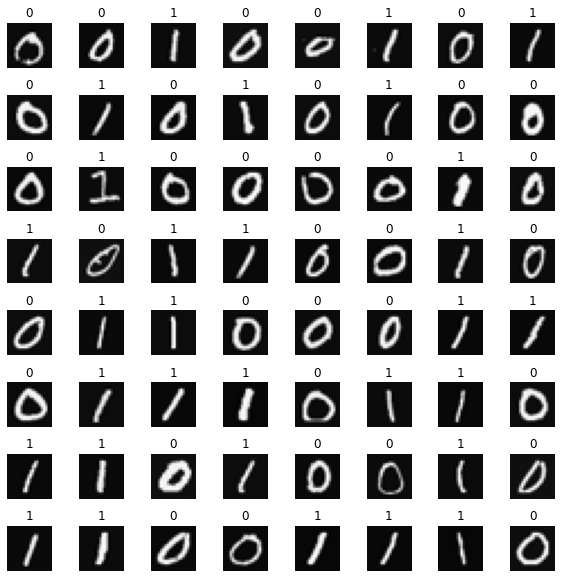

In [5]:
#Visualizing the Data

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

In [6]:
#Sequential model

model = Sequential(
    [               
        tf.keras.Input(shape=(400,)),    #specify input size

        tf.keras.layers.Dense(25, activation="sigmoid"),
        tf.keras.layers.Dense(15, activation="sigmoid"),
        tf.keras.layers.Dense(1, activation="sigmoid")    

    ], name = "my_model" 
)  

In [7]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                10025     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


In [8]:
[layer1, layer2, layer3] = model.layers

W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()

print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


In [9]:
print(model.layers[2].weights)

[<tf.Variable 'dense_2/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[ 0.04995292],
       [-0.23487234],
       [ 0.43063182],
       [-0.41529086],
       [ 0.02592057],
       [-0.53502667],
       [ 0.1534397 ],
       [ 0.18189222],
       [ 0.34824866],
       [ 0.22531688],
       [-0.40931827],
       [-0.15447515],
       [ 0.39400262],
       [-0.36614925],
       [-0.00653619]], dtype=float32)>, <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


In [10]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
            )

model.fit( X,y, epochs=20 )

Epoch 1/20
32/32 [==============================] - 1s 2ms/step - loss: 0.6265
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.4709
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3258
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2262
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1652
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1270
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1019
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0841
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0709
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0609
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0532
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0468
Epoch 13/20
32/32 [==============================

In [11]:
prediction = model.predict(X[0].reshape(1,400))  # a zero
print(f" predicting a zero: {prediction}")

prediction = model.predict(X[500].reshape(1,400))  # a one
print(f" predicting a one:  {prediction}")

1/1 [==============================] - 0s 79ms/step
 predicting a zero: [[0.01808489]]
1/1 [==============================] - 0s 19ms/step
 predicting a one:  [[0.98233074]]


In [12]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"prediction after threshold: {yhat}")

prediction after threshold: 1


1/1 [==============================] - 0s 18ms/step


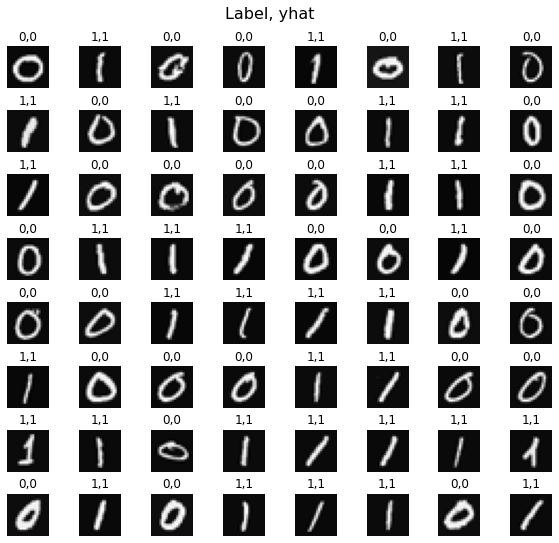

In [13]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
    
fig.suptitle("Label, yhat", fontsize=16)
plt.show()